In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0569-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0523-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1285-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1262-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1017-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0971-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0937-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0561-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0425-0001.jpeg
/kaggle

In [2]:
!pip install fastai==2.1.5

     |████████████████████████████████| 188 kB 1.3 MB/s 
     |████████████████████████████████| 48 kB 3.3 MB/s 
     |████████████████████████████████| 776.7 MB 3.4 kB/s 
     |████████████████████████████████| 12.7 MB 16.8 MB/s 
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.2.5
    Uninstalling fastcore-1.2.5:
      Successfully uninstalled fastcore-1.2.5
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0
    Uninstalling torch-1.6.0:
      Successfully uninstalled torch-1.6.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.7.0
    Uninstalling torchvision-0.7.0:
      Successfully uninstalled torchvision-0.7.0
  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.18
    Uninstalling fastai-2.0.18:
      Successfully uninstalled fastai-2.0.18


In [3]:
import random, os
import numpy as np
import torch
from fastai.vision.all import *

In [4]:
path = Path('/kaggle/input/chest-xray-pneumonia/chest_xray/')
export_path = Path('./')
path.ls()

(#5) [Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/train'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/val'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/test')]

In [5]:
dls = ImageDataLoaders.from_folder(path, train='train', valid= 'val', item_tfms=Resize(224),bs=64)

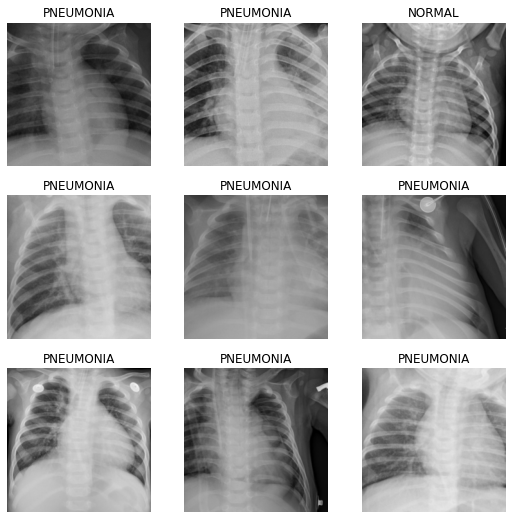

In [6]:
dls.show_batch()

In [7]:
dls.vocab

['NORMAL', 'PNEUMONIA']

In [8]:
dls.c

2

In [9]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy], model_dir="/kaggle/working")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


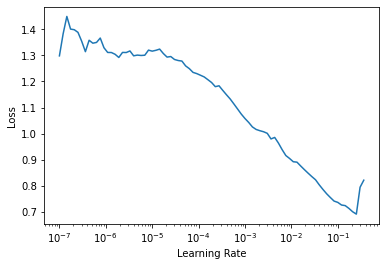

In [10]:
lr_min, lr_steep = learn.lr_find()

In [11]:
learn.fit_one_cycle(1, lr_max=1e-1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.491947,1.348582,0.437500,0.562500,01:19


In [12]:
learn.unfreeze() 

In [13]:
learn.fit_one_cycle(4, lr_max=1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.203856,1.581201,0.375000,0.625000,01:22
1,0.137257,1.387453,0.250000,0.750000,01:25
2,0.094220,0.686126,0.125000,0.875000,01:21
3,0.073152,0.909329,0.312500,0.687500,01:23


In [14]:
interp = ClassificationInterpretation.from_learner(learn)

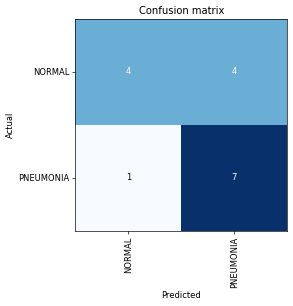

In [15]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

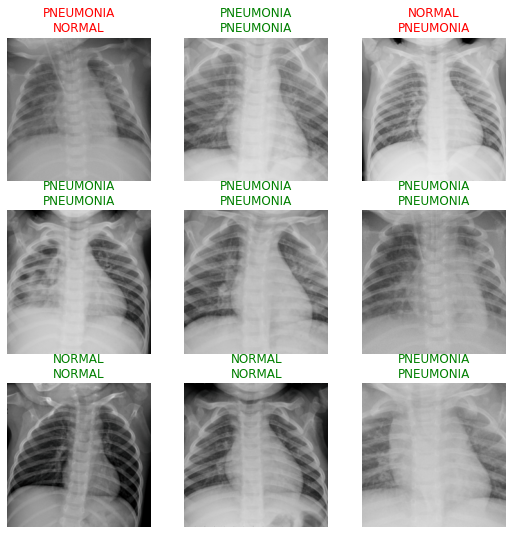

In [16]:
learn.show_results()

In [17]:
learn.export(Path("/kaggle/working/export.pkl"))

In [18]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]